In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')


In [13]:
## Load Dataset

import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
    
train=pd.read_csv(r"C:\Users\VIKRAMJEET\Downloads\Data Science\Python by Harshil Bansal\Datasets\titanic\train.csv")
test=pd.read_csv(r"C:\Users\VIKRAMJEET\Downloads\Data Science\Python by Harshil Bansal\Datasets\titanic\test.csv")


In [14]:
print(f"Train set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Train set shape: (891, 12)
Test set shape: (418, 11)


In [17]:
## Merge train and test data
df = pd.concat([train,test])
print(f"Combined dataset shape : {df.shape}")

Combined dataset shape : (1309, 12)


In [18]:
## Data overview
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


 - Column survived is the target column
 - Column age seems to have some missing values which can be handled
 - Column Fare also has 1 missing value which is easy to fix
 - Cabin has most missing values thus dropping it would be the best option
 - Passenger ID is just an identification interger thus can be dropped

Text(0, 0.5, 'Column Count')

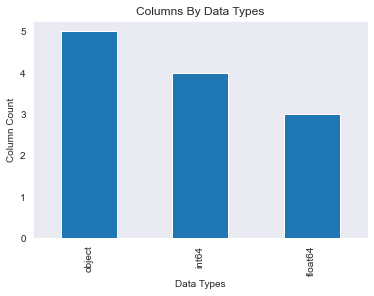

In [22]:
df.dtypes.value_counts().plot(kind='bar',title='Columns By Data Types')
plt.xlabel('Data Types')
plt.ylabel('Column Count')

- There are more categorical variables than continous ones

### Explore categorical variables

In [23]:
df.select_dtypes(object).head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


### Explore continous variables

In [26]:
df.select_dtypes('number').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


### Data Cleaning

1. Drop PassengerId
2. Drop Cabin
3. Fill missing values for age
4. Fill missing values for Fare

In [27]:
# drop cabin and passengerId columns
df.drop(['PassengerId','Cabin'],axis=1,inplace=True)

### Handling missing values for Age

Text(0.5, 1.0, 'Age Distribution (Before Cleaning)')

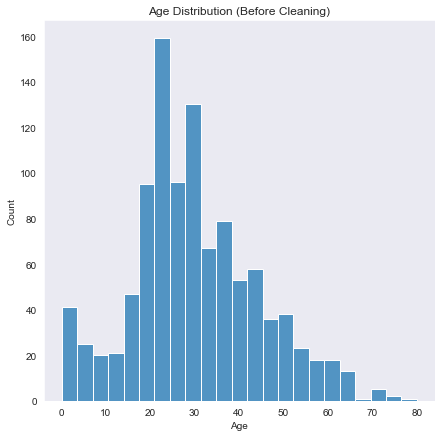

In [28]:
fig,ax = plt.subplots(figsize=(7,7))
age = df['Age'].dropna()
sns.histplot(data=age,ax=ax).set_title('Age Distribution (Before Cleaning)')

There were more people on the ship whose age between 20 to 40 years.

In [29]:
# Fill missing values with the mode of age
df['Age'] = df['Age'].fillna(df['Age'].median())

Text(0.5, 1.0, 'Age Distribution (After Cleaning)')

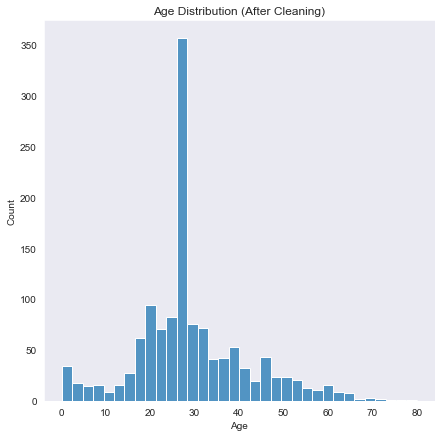

In [30]:
fig,ax = plt.subplots(figsize=(7,7))
age = df['Age'].dropna()
sns.histplot(data=age,ax=ax).set_title('Age Distribution (After Cleaning)')

### Handling missing values for Fare

Text(0.5, 1.0, 'Fare Distribution (Before Cleaning)')

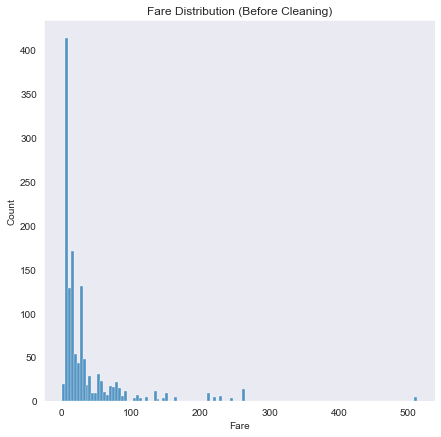

In [32]:
fig,ax = plt.subplots(figsize=(7,7))
age = df['Fare'].dropna()
sns.histplot(data=age,ax=ax).set_title('Fare Distribution (Before Cleaning)')

In [34]:
# Fill Fare values by its mode
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

### Handling missing values for Emabarked

Text(0.5, 1.0, 'Embarked Distribution')

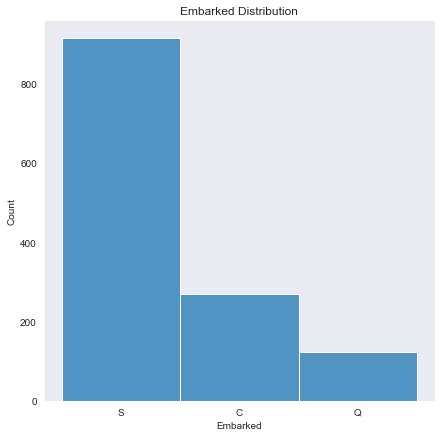

In [36]:
fig,ax = plt.subplots(figsize=(7,7))
age = df['Embarked'].dropna()
sns.histplot(data=age,ax=ax).set_title("Embarked Distribution")

- S = Southhamption
- C = Cherbourg
- Q = Queenstown

Most people embarked from Southhampton

In [37]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### Exploratory Data Analysis

In [38]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 112.5+ KB


#### Univariate analysis

In [40]:
def show_univariate_chart(df, variable,title):
    fig,ax = plt.subplots(figsize=(7,7))
    age = df[variable].dropna()
    age.value_counts().plot(kind="bar",title=f"{title} Distribution")
    plt.xlabel(title)
    plt.ylabel("Count")

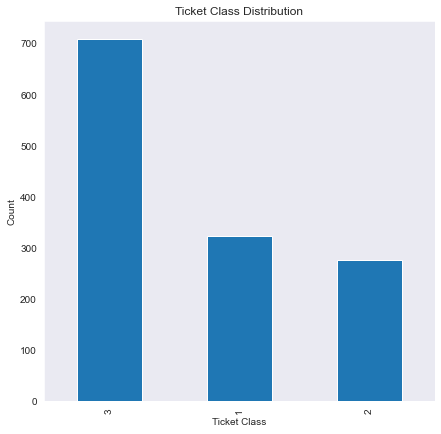

In [41]:
show_univariate_chart(df,"Pclass","Ticket Class")

* 3 = Lower Class
* 2 = Middle Class
* 1 = Upper Class
​
There were more lower class people on the ship

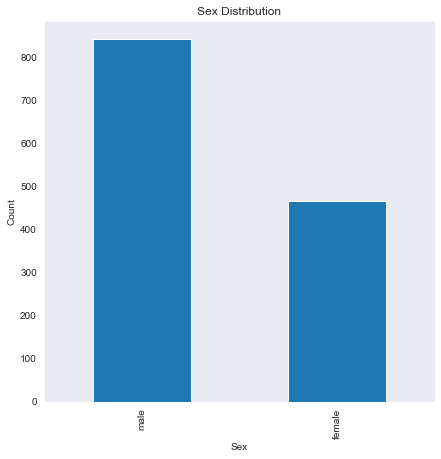

In [42]:
show_univariate_chart(df,"Sex","Sex")

There were more males than females on the ship

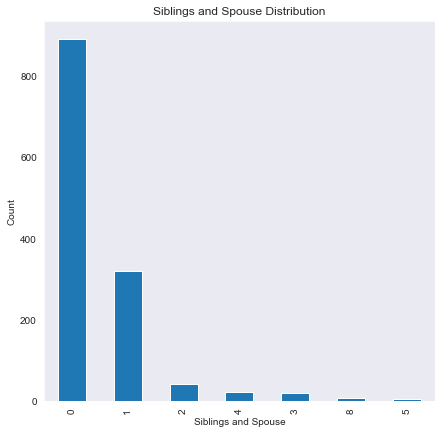

In [43]:
show_univariate_chart(df,"SibSp","Siblings and Spouse")

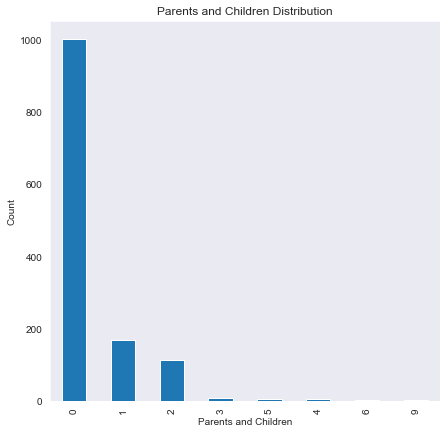

In [44]:
show_univariate_chart(df,"Parch","Parents and Children")

#### Corelations

<AxesSubplot:>

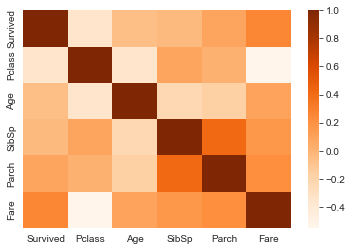

In [45]:
sns.heatmap(df.dropna().corr(), cmap="Oranges")

Text(0.5, 1.0, 'Age to Survival Ratio')

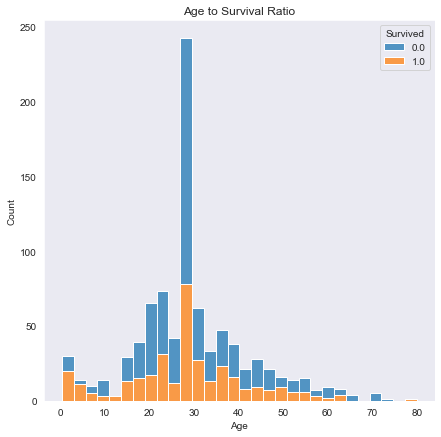

In [46]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(),x="Age",hue="Survived",multiple="stack",ax=ax).set_title("Age to Survival Ratio")

Text(0.5, 0, 'Gender')

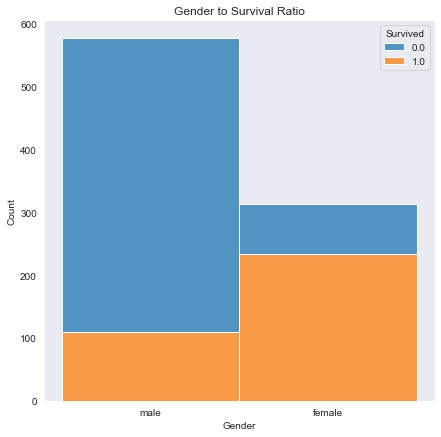

In [47]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(),x="Sex",hue="Survived",multiple="stack",ax=ax).set_title("Gender to Survival Ratio")
plt.xlabel("Gender")

Females were prioritized during the evacuation


Text(0.5, 0, 'Passenger Class')

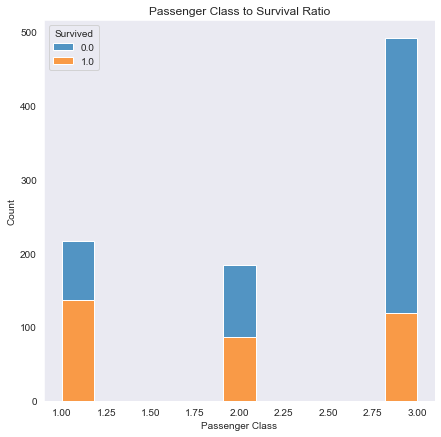

In [49]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(),x="Pclass",hue="Survived",multiple="stack",ax=ax).set_title("Passenger Class to Survival Ratio")
plt.xlabel("Passenger Class")


First class passengers were given more priority during evacuation


Text(0.5, 0, 'Embarked From')

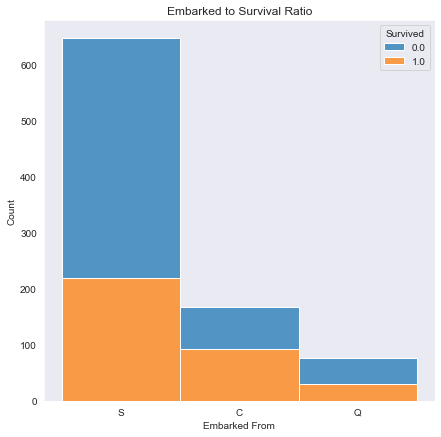

In [50]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(),x="Embarked",hue="Survived",multiple="stack",ax=ax).set_title("Embarked to Survival Ratio")
plt.xlabel("Embarked From")


People who embarked from Southhampton had more survival ratio than people who emabarked from somewhere else


Text(0.5, 0, 'Siblings / Spouse')

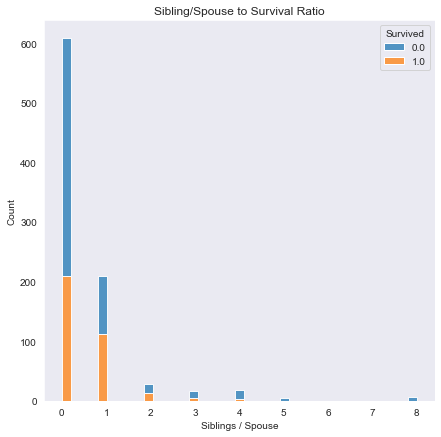

In [51]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(),x="SibSp",hue="Survived",multiple="stack",ax=ax).set_title("Sibling/Spouse to Survival Ratio")
plt.xlabel("Siblings / Spouse")

Text(0.5, 0, 'Parent/Children Count')

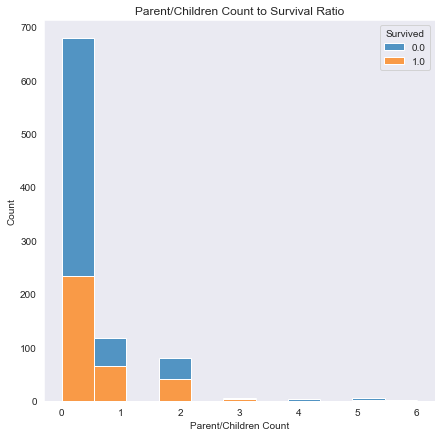

In [52]:
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df.dropna(),x="Parch",hue="Survived",multiple="stack",ax=ax).set_title("Parent/Children Count to Survival Ratio")
plt.xlabel("Parent/Children Count")


Check if row with parch value 3 is an outlier or not?

#### Passenger Initials Importance

In [53]:
def get_initial(name):
    return name.split(",")[1].split(". ")[0]

df['Initial'] = df['Name'].apply(lambda x: get_initial(x))

Text(0.5, 0, 'Initials')

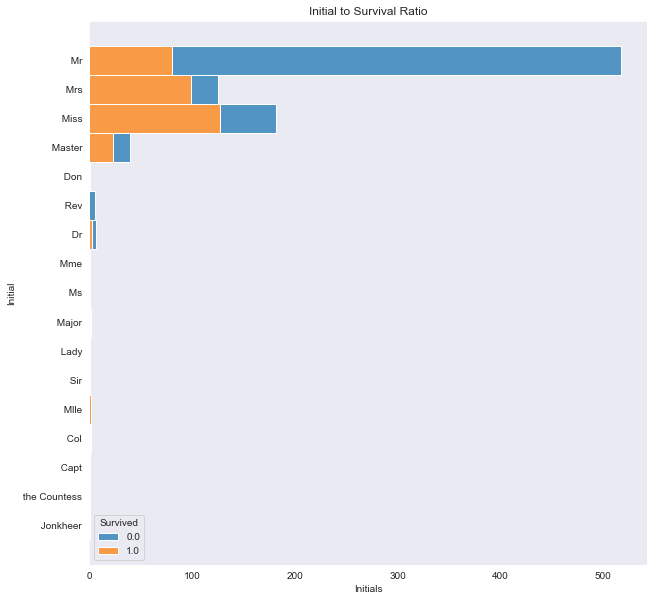

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data=df.dropna(),y="Initial",hue="Survived",multiple="stack",ax=ax).set_title("Initial to Survival Ratio")
plt.xlabel("Initials")

### Regression
---

1. Feature Selection
2. Convert categorical datapoints to numericals
3. Split test and training data
4. Test on different models
5. Select the one with best accuracy

#### Handle Categorical Values

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
sex_le = LabelEncoder()
sex_le.fit(df.Sex)
sex_transformed = sex_le.transform(df.Sex)
df['Sex'] = sex_transformed

In [57]:
embarked_le = LabelEncoder()
embarked_le.fit(df.Embarked)
embarked_transformed = embarked_le.transform(df.Embarked)
df['Embarked'] = embarked_transformed

In [58]:
initial_le = LabelEncoder()
initial_le.fit(df['Initial'])
initial_transformed = initial_le.transform(df['Initial'])
df['Initial'] = initial_transformed

In [59]:
df['Age'] = df['Age'].astype(int)

#### Feature Selection

In [60]:
irrelevant_features = ['Ticket','Fare','Name']
model_df = df.drop(irrelevant_features,axis=1)
model_df.dropna(inplace=True)

### Prepare Train Test Data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
y = model_df['Survived']
x = model_df.drop(['Survived'],axis=1)

In [63]:
x_train, x_test, y_train,y_test = train_test_split(x, y)

#### Build Classification Model

In [64]:
from sklearn import metrics

#### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8161434977578476


#### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
fr_pred = random_forest.predict(x_test)
print(metrics.accuracy_score(y_test, fr_pred))

0.8071748878923767


#### Support Vector Machines

In [67]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
print(metrics.accuracy_score(y_test, svc_pred))

0.6771300448430493


#### Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)
dc_pred = dc.predict(x_test)
print(metrics.accuracy_score(y_test, dc_pred))

0.7802690582959642


#### Testing on actual test set

In [69]:
test_df = df[df['Survived'].isnull()]
test_df = test_df.drop(['Survived'],axis=1)

In [70]:
test_df = test_df.drop(irrelevant_features,axis=1)

In [71]:
test_set_pred = log_reg.predict(test_df)

#### Create Submission Dataframe

In [72]:
passenger_ids = list(test['PassengerId'])
submission_df = pd.DataFrame({"PassengerId":passenger_ids, "Survived":test_set_pred})
submission_df.head(10)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


In [73]:
submission_df['Survived'] = submission_df['Survived'].astype(int)

In [74]:
submission_df.to_csv("submission_int.csv",index=False)
